# Project Benson Visualizations
## Hasan Haq, Tiffany Li, Masa Kato

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.timeseries
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

**The commented parts represent the code for our data mining and pickling process.  You can just run all cells to read the pickles saved in the folder.**

In [2]:
# Read Stored Dataframes, total and by month
# data = pd.read_pickle('dataframe.pkl')
# data_april = pd.read_pickle('data_april.pkl')
# data_may = pd.read_pickle('data_may.pkl')
# data_june = pd.read_pickle('data_june.pkl')

In [3]:
# # Compute entries per turnstile
# april_entries_raw = data_april.groupby(by=['STATION','UNIT','LINENAME','SCP','DATE'])['ENTRIES'].apply(lambda x: max(x) - min(x))
# april_exits_raw = data_april.groupby(by=['STATION','UNIT','LINENAME','SCP','DATE'])['EXITS'].apply(lambda x: max(x) - min(x))
# may_entries_raw = data_may.groupby(by=['STATION','UNIT','LINENAME','SCP','DATE'])['ENTRIES'].apply(lambda x: max(x) - min(x))
# may_exits_raw = data_may.groupby(by=['STATION','UNIT','LINENAME','SCP','DATE'])['EXITS'].apply(lambda x: max(x) - min(x))
# june_entries_raw = data_june.groupby(by=['STATION','UNIT','LINENAME','SCP','DATE'])['ENTRIES'].apply(lambda x: max(x) - min(x))
# june_exits_raw = data_june.groupby(by=['STATION','UNIT','LINENAME','SCP','DATE'])['EXITS'].apply(lambda x: max(x) - min(x))

In [4]:
# Function to handle outliers
def replace(group):
    median = group.median()
    outliers = (group - median).abs() > 10*median
    group[outliers] = int(median)
    return group

In [5]:
# # Fix outliers in DataFrames
# april_entries = april_entries_raw.groupby(level=['UNIT','LINENAME','SCP']).apply(replace)
# april_exits = april_exits_raw.groupby(level=['UNIT','LINENAME','SCP']).apply(replace)
# may_entries = may_entries_raw.groupby(level=['UNIT','LINENAME','SCP']).apply(replace)
# may_exits = may_exits_raw.groupby(level=['UNIT','LINENAME','SCP']).apply(replace)
# june_entries = june_entries_raw.groupby(level=['UNIT','LINENAME','SCP']).apply(replace)
# june_exits = june_exits_raw.groupby(level=['UNIT','LINENAME','SCP']).apply(replace)

In [6]:
# # Store New Dataframe 
# april_entries.to_pickle('april_entries.pkl')
# april_exits.to_pickle('april_exits.pkl')
# may_entries.to_pickle('may_entries.pkl')
# may_exits.to_pickle('may_exits.pkl')
# june_entries.to_pickle('june_entries.pkl')
# june_exits.to_pickle('june_exits.pkl')

In [7]:
# Read entries/exits data
april_entries = pd.read_pickle('april_entries.pkl')
april_exits = pd.read_pickle('april_exits.pkl')
may_entries = pd.read_pickle('may_entries.pkl')
may_exits = pd.read_pickle('may_exits.pkl')
june_entries = pd.read_pickle('june_entries.pkl')
june_exits = pd.read_pickle('june_exits.pkl')

In [8]:
# Compute entries per day
april_entries_station_perday = april_entries.groupby(level=['STATION','DATE']).sum()
april_exits_station_perday = april_exits.groupby(level=['STATION','DATE']).sum()
april_total_station_perday = april_entries_station_perday + april_exits_station_perday
may_entries_station_perday = may_entries.groupby(level=['STATION','DATE']).sum()
may_exits_station_perday = may_exits.groupby(level=['STATION','DATE']).sum()
may_total_station_perday = may_entries_station_perday + may_exits_station_perday
june_entries_station_perday = june_entries.groupby(level=['STATION','DATE']).sum()
june_exits_station_perday = june_exits.groupby(level=['STATION','DATE']).sum()
june_total_station_perday = june_entries_station_perday + june_exits_station_perday
total_perday = pd.concat([april_total_station_perday, may_total_station_perday, june_total_station_perday])

In [9]:
# Compute average entries + exits per day
april_entries_station_mean = april_entries_station_perday.groupby(level=['STATION']).mean()
april_exits_station_mean = april_exits_station_perday.groupby(level=['STATION']).mean()
april_total_station_mean = april_entries_station_mean + april_exits_station_mean
may_entries_station_mean = may_entries_station_perday.groupby(level=['STATION']).mean()
may_exits_station_mean = may_exits_station_perday.groupby(level=['STATION']).mean()
may_total_station_mean = may_entries_station_mean + may_exits_station_mean
june_entries_station_mean = june_entries_station_perday.groupby(level=['STATION']).mean()
june_exits_station_mean = june_exits_station_perday.groupby(level=['STATION']).mean()
june_total_station_mean = june_entries_station_mean + june_exits_station_mean
total_station_mean = total_perday.groupby(level=['STATION']).mean()

In [10]:
# Prepare DataFrames for charting
top_50 = total_perday.groupby(level=['STATION']).mean().sort_values(ascending=False).head(50)
df_top_50 = total_perday[total_perday.index.isin(top_50.index, level=0)].groupby(level=['DATE']).mean().to_frame()
df_total_mean = total_perday.groupby(level=['DATE']).mean().to_frame()
df_total_max = total_perday.groupby(level=['DATE']).max().to_frame()
df_total_min = total_perday.groupby(level=['DATE']).min().to_frame()
df_top_50.columns = ['ENTRIES']
df_top_50['ENTRIES'] = df_top_50['ENTRIES'].map(lambda x: x/1000)
df_top_50['LABELS'] = [x.strftime('%m-%d') for x in df_top_50.index]
df_top_50['WEEKDAY'] = [x.weekday() for x in df_top_50.index]
df_total_mean.columns = ['ENTRIES']
df_total_mean['ENTRIES'] = df_total_mean['ENTRIES'].map(lambda x: x/1000)
df_total_mean['LABELS'] = [x.strftime('%m-%d') for x in df_total_mean.index]
df_total_mean['WEEKDAY'] = [x.weekday() for x in df_total_mean.index]
df_total_max.columns = ['ENTRIES']
df_total_max['ENTRIES'] = df_total_max['ENTRIES'].map(lambda x: x/1000)
df_total_max['LABELS'] = [x.strftime('%m-%d') for x in df_total_max.index]
df_total_max['WEEKDAY'] = [x.weekday() for x in df_total_max.index]
df_total_min.columns = ['ENTRIES']
df_total_min['ENTRIES'] = df_total_min['ENTRIES'].map(lambda x: x/1000)
df_total_min['LABELS'] = [x.strftime('%m-%d') for x in df_total_min.index]
df_total_min['WEEKDAY'] = [x.weekday() for x in df_total_min.index]
df_top_50_wkd = df_top_50.ix[df_top_50['WEEKDAY'] != 5]
df_top_50_wkd = df_top_50_wkd.ix[df_top_50['WEEKDAY'] != 6]
df_top_50_wkd = df_top_50_wkd.ix[df_top_50['LABELS'] != '05-30']
df_total_mean_wkd = df_total_mean.ix[df_top_50['WEEKDAY'] != 5]
df_total_mean_wkd = df_total_mean_wkd.ix[df_total_mean_wkd['WEEKDAY'] != 6]
df_total_mean_wkd = df_total_mean_wkd.ix[df_total_mean_wkd['LABELS'] != '05-30']
df_total_min_wkd = df_total_min.ix[df_total_min['WEEKDAY'] != 5]
df_total_min_wkd = df_total_min_wkd.ix[df_total_min_wkd['WEEKDAY'] != 6]
df_total_min_wkd = df_total_min_wkd.ix[df_total_min_wkd['LABELS'] != '05-30']
df_total_max_wkd = df_total_max.ix[df_total_max['WEEKDAY'] != 5]
df_total_max_wkd = df_total_max_wkd.ix[df_total_max_wkd['WEEKDAY'] != 6]
df_total_max_wkd = df_total_max_wkd.ix[df_total_max_wkd['LABELS'] != '05-30']

In [11]:
# Prepare DataFrames for target 10 stations
df_april = april_total_station_perday.to_frame()
df_april.reset_index(inplace = True)
df_april.columns = ['STATION', 'DATE', 'ENTRIES']
df_may = may_total_station_perday.to_frame()
df_may.reset_index(inplace = True)
df_may.columns = ['STATION', 'DATE', 'ENTRIES']
df_june = june_total_station_perday.to_frame()
df_june.reset_index(inplace = True)
df_june.columns = ['STATION', 'DATE', 'ENTRIES']

top_cols = ['GRD CNTRL-42 ST',
            '34 ST-HERALD SQ',
            'TIMES SQ-42 ST',
            '42 ST-PORT AUTH',
            '14 ST',
            '42 ST-BRYANT PK',
            'CHURCH AV',
            'BEDFORD AV',
            'BOROUGH HALL',
            '33 ST']

df_april_top = df_april.copy(deep = True)
df_april_top = df_april_top[df_april_top['STATION'].isin(top_cols)]
df_april_top = df_april_top.pivot(index='DATE', columns='STATION', values='ENTRIES')
df_april_top['MEAN'] = df_april_top.mean(axis=1)
df_april_top['MEAN']
df_april_top.columns = [x for x in df_april_top.columns]
df_april_top.index.name = None

df_may_top = df_may.copy(deep = True)
df_may_top = df_may_top[df_may_top['STATION'].isin(top_cols)]
df_may_top = df_may_top.pivot(index='DATE', columns='STATION', values='ENTRIES')
df_may_top['MEAN'] = df_may_top.mean(axis=1)
df_may_top['MEAN']
df_may_top.columns = [x for x in df_may_top.columns]
df_may_top.index.name = None

df_june_top = df_june.copy(deep = True)
df_june_top = df_june_top[df_june_top['STATION'].isin(top_cols)]
df_june_top = df_june_top.pivot(index='DATE', columns='STATION', values='ENTRIES')
df_june_top['MEAN'] = df_june_top.mean(axis=1)
df_june_top['MEAN']
df_june_top.columns = [x for x in df_june_top.columns]
df_june_top.index.name = None

df_total_top = pd.concat([df_april_top, df_may_top, df_june_top])
df_total_top['LABELS'] = [x.strftime('%m-%d') for x in df_total_top.index]
df_total_top['MONTH'] = df_total_top.index.map(lambda x: x.strftime("%B"))
df_total_top['ENTRIES'] = [x/1000 for x in df_total_top['MEAN']]
df_total_top['WEEKDAY'] = [x.weekday() for x in df_total_top.index]

df_total_top_wkd = df_total_top.ix[df_total_top['WEEKDAY'] != 5]
df_total_top_wkd = df_total_top_wkd.ix[df_total_top_wkd['WEEKDAY'] != 6]
df_total_top_wkd = df_total_top_wkd.ix[df_total_top_wkd['LABELS'] != '05-30']

df_june_top['DAY'] = [x for x in range(1,len(df_june_top.index)+1)];
df_june_top['MEAN_1000'] = [x/1000 for x in df_june_top['MEAN']]
df_june_top['MAX_1000'] = [x/1000 for x in df_june_top['MEAN']]
df_june_top['LABELS'] = ['W\n6-1', 'Th\n6-2', 'F\n6-3', 'Sa\n6-4', 'Su\n6-5', 
                         'M\n6-6', 'Tu\n6-7', 'W\n6-8', 'Th\n6-9', 'F\n6-10', 
                         'Sa\n6-11', 'Su\n6-12', 'M\n6-13', 'Tu\n6-14', 'W\n6-15', 
                         'Th\n6-16', 'F\n6-17', 'Sa\n6-18', 'Su\n6-19','M\n6-20', 
                         'Tu\n6-21', 'WED\n6-22', 'Th\n6-23', 'F\n6-24', 'Sa\n6-25', 
                         'Su\n6-26','M\n6-27', 'Tu\n6-28', 'W\n6-29', 'Th\n6-30']

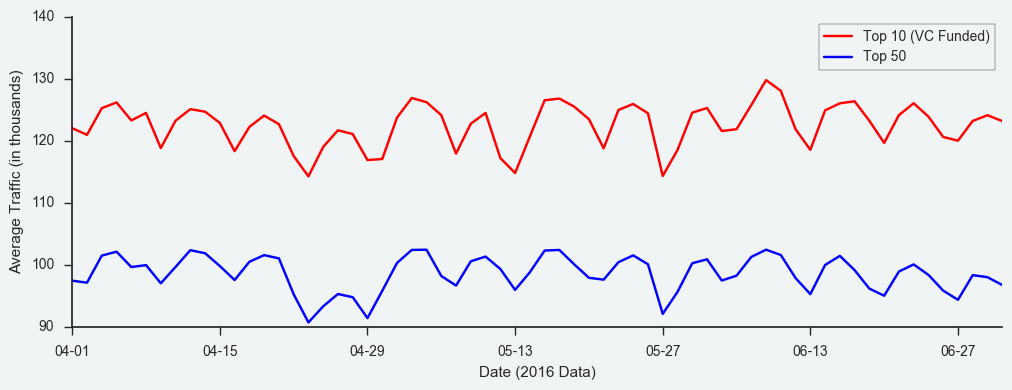

In [18]:
# Create a Matplotlib chart of average of our recommended stations vs top 50 total

ax = df_total_top_wkd.plot('LABELS', 'ENTRIES', style='r', label="Top 10 (VC Funded)")
df_top_50_wkd.plot('LABELS', 'ENTRIES', style='b', label="Top 50", ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig = plt.gcf()
fig.set_size_inches(12, 4, forward=True)
plt.xlabel('Date (2016 Data)')
plt.ylabel('Average Traffic (in thousands)')
plt.ylim(90,140)
plt.legend(frameon=True)
plt.show();

In [13]:
# Create function to set the chart formatting for following two Seaborn charts

def setstyle():
    seaborn.set(rc={'figure.facecolor':'#F1F4F4', 
                'axes.facecolor':'#F1F4F4', 
                'axes.grid':False, 
                'axes.edgecolor': '.15', 
                'grid.color': '.15', 
                'axes.axisbelow': True, 
                'axes.linewidth': '1.25',
                'xtick.color': '.15',
                'xtick.direction': 'out',
                'xtick.major.size': 6.0,
                'xtick.minor.size': 3.0,
                'ytick.color': '.15',
                'ytick.direction': 'out',
                'ytick.major.size': 6.0,
                'ytick.minor.size': 3.0})

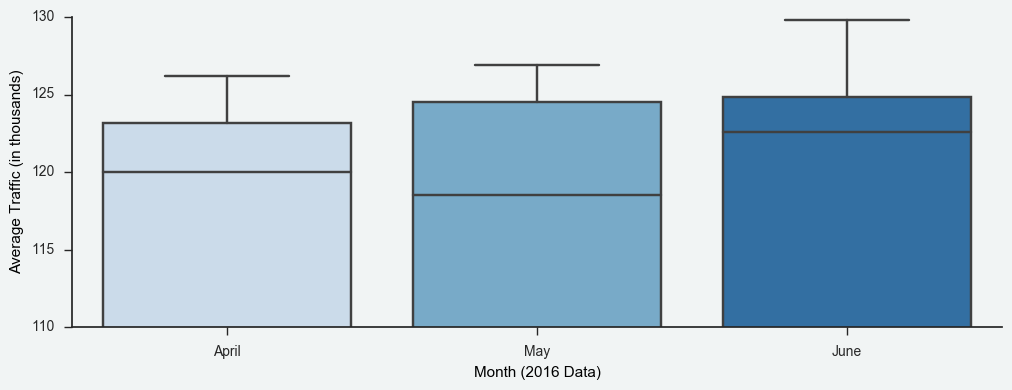

In [17]:
# Create boxplot to show total data for three months and whether there is a signficant difference

g = sns.boxplot(x=df_total_top['MONTH'], y=df_total_top['ENTRIES'], palette="Blues");
sns.set(style = 'dark', font_scale=1.5)
setstyle()
sns.despine()
g.figure.set_size_inches(12,4);
g.set_xlabel("Month (2016 Data)", color="black",alpha=1);
g.set_ylabel("Average Traffic (in thousands)", color="black", alpha=1)
g.set(ylim=(110, 130));

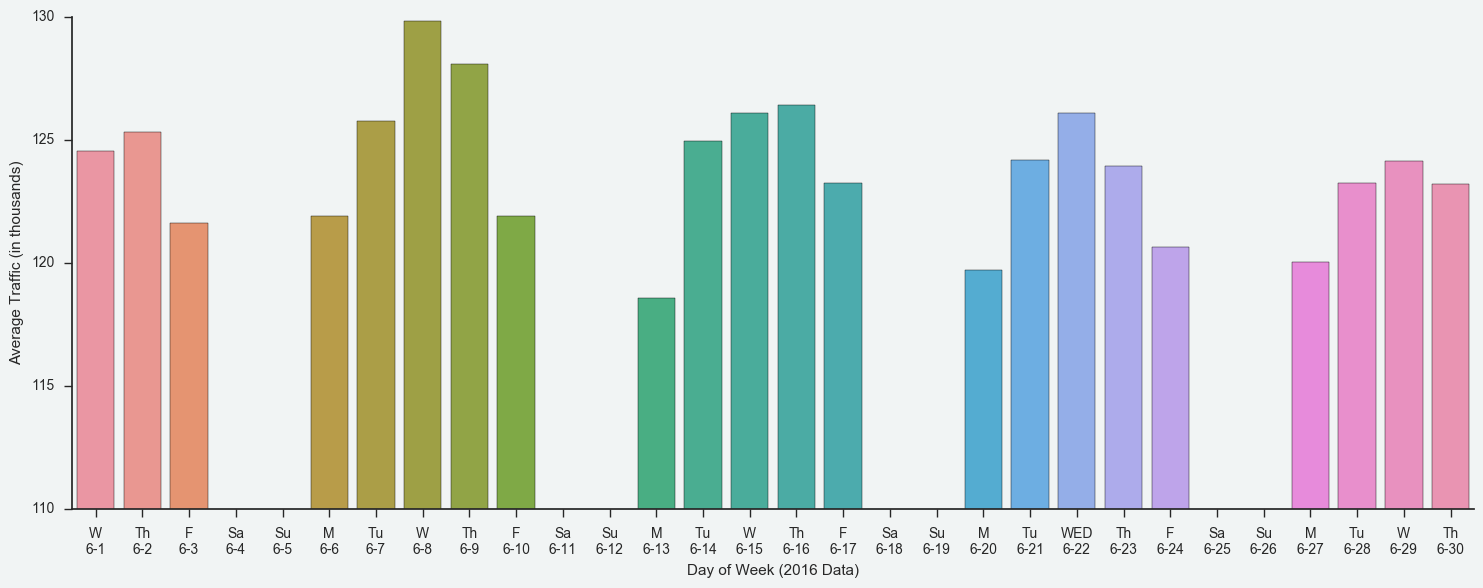

In [15]:
# Bar chart to determine which day of week to market

sns.set(style='ticks', font_scale=1.5);
setstyle()
s = sns.factorplot(x='LABELS', y='MEAN_1000', data=df_june_top, kind="bar", size=6, aspect=2.5)
s.set_axis_labels("Day of Week (2016 Data)", "Average Traffic (in thousands)")
s.set(ylim=(110, 130));